In [1]:
import numpy as np
import sympy as sp
from typing import Callable, Iterable, Optional
from matplotlib import pyplot as plt
import scipy

# Trabalho 2

In [2]:
def taylormethod(funcs: Iterable[Callable[[float, float], float]], y0: float, t: Iterable[float]):
    """
    Solves 
    """
    y0 = np.array(y0, dtype="float64")
    t = np.array(t, dtype="float64")
    n = len(t)
    w = np.zeros([n]+list(y0.shape), dtype="float64")
    w_ = np.zeros([n]+list(y0.shape), dtype="float64")
    f0 = funcs[0]

    T = lambda ti, yi, hi: np.sum([hi**j * f(ti, yi)/scipy.special.factorial(j) for j, f in enumerate(funcs)])
        
    w[0] = y0
    w_[0] = f0(t[0], w[0])
    for i in range(n-1):
        h = t[i+1]-t[i]
        Ti = T(t[i], w[i], h)
        w[i + 1] = w[i] + h * Ti
        w_[i + 1] = f0(t[i + 1], w[i + 1])
    return w, w_



def RK1(f: Callable[[float, float], float], ti: float, h: float, wi: float):
    """Runge Kutta of order 1. Same as Modified Euler's Method"""
    k1 = h * f(ti, wi)
    k2 = h * f(ti + h, wi + k1)
    return (k1+k2)/2

def RK2(f: Callable[[float, float], float], ti: float, h: float, wi: float):
    """Runge Kutta of order 2. Same as Midpoint method. Has error O(h^2)"""
    k1 = h * f(ti, wi)
    k2 = h * f(ti + h / 2, wi + k1 / 2)
    return k2

def RK3(f: Callable[[float, float], float], ti: float, h: float, wi: float):
    """Runge Kutta of order 3, Same as Heun's method. Has error O(h^3)"""
    k1 = h * f(ti, wi)
    k2 = h * f(ti + h / 3, wi + k1 / 3)
    k3 = h * f(ti + 2 * h / 3, wi + 2 * k2 / 3)
    return (k1 + 3 * k3) / 4

def RK4(f: Callable[[float, float], float], ti: float, h: float, wi: float):
    k1 = h * f(ti, wi)
    k2 = h * f(ti + h / 2, wi + h * k1 / 2)
    k3 = h * f(ti + h / 2, wi + h * k2 / 2)
    k4 = h * f(ti + h, wi + h * k3)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

def rungekuttamethod(f: Callable[[float, float], float], y0: float, t: Iterable[float], order : Optional[int] = 4):
    order = int(order)
    if not (0 < order < 5):
        raise ValueError("The order must be [1, 2, 3 or 4]")
    y0 = np.array(y0, dtype="float64")
    t = np.array(t, dtype="float64")
    n = len(t)
    w = np.zeros([n]+list(y0.shape), dtype="float64")
    w_ = np.zeros([n]+list(y0.shape), dtype="float64")

    RKS = [RK1, RK2, RK3, RK4]
    RK = RKS[order - 1]
    
    w[0] = y0
    w_[0] = f(t[0], w[0])
    for i in range(n-1):
        h = t[i+1]-t[i]
        w[i + 1] = w[i] + RK(f, t[i], h, w[i])
        w_[i + 1] = f(t[i + 1], w[i + 1])
    return w, w_

def eulerexplicit(f: Callable[[float, float], float], y0: float, t: Iterable[float]):
    return taylormethod([f], y0, t)


### Exercicio 1

> $$y' = 2-2t+4t^2-4t^3-4t^4$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = 1+2t-t^2+ \frac{4}{3}t^3-t^4-\frac{4}{5}t^5$$


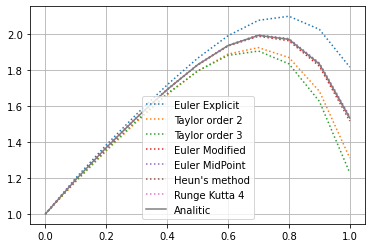

In [3]:
npts = 11
ts = np.linspace(0, 1, npts)
y0 = 1
f = lambda t, y: 2 - 2*t+4*t**2 - 4*t**3 - 4*t**4
f_ = lambda t, y: -2+8*t-12*t**2-16*t**3
f__ = lambda t, y: 8-24*t-48*t**2
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, order = 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, order = 2)
w_heun, _ = rungekuttamethod(f, y0, ts, order = 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, order = 4)
yanalitic = 1 + 2*ts - ts**2 + (4/3)*ts**3 - ts**4 - (4/5)*ts**5
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 2

> $$y' = 1+\dfrac{1}{t}y$$
> $$1 \le t \le 2 \ \ \ \ \ \ y(1)=2$$
> 
> Solução analítica
>
> $$y(t) = t\cdot \ln t +2t$$

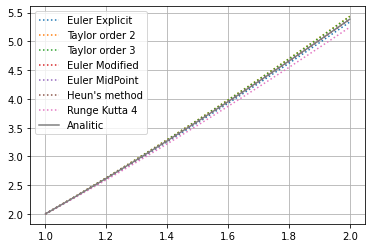

In [4]:
npts = 11
ts = np.linspace(1, 2, npts)
y0 = 2
f = lambda t, y: 1 + y/t
f_ = lambda t, y: 1/t
f__ = lambda t, y: -1/t**2
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, order = 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, order = 2)
w_heun, _ = rungekuttamethod(f, y0, ts, order = 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, order = 4)
yanalitic = ts * np.log(ts) + 2*ts
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 3

> $$y' = t^2\cdot y$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = \exp \left(\dfrac{t^3}{3}\right)$$

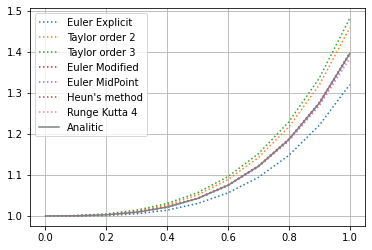

In [5]:
npts = 11
ts = np.linspace(0, 1, npts)
y0 = 1
f = lambda t, y: y * t**2
f_ = lambda t, y: y * (2*t + t**4)
f__ = lambda t, y: y * (2 + 6*t**3+t**6)
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, order = 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, order = 2)
w_heun, _ = rungekuttamethod(f, y0, ts, order = 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, order = 4)
yanalitic = np.exp(ts**3/3)
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 4

> $$y' = t \cdot y^2$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=1$$
> 
> Solução analítica
>
> $$y(t) = \dfrac{2}{2-t^2}$$

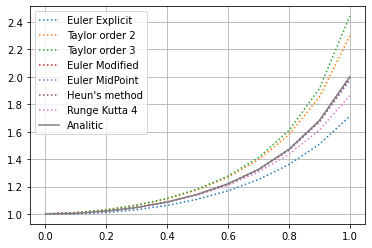

In [6]:
npts = 11
ts = np.linspace(0, 1, npts)
y0 = 1
f = lambda t, y: t*y**2
f_ = lambda t, y: y**2 * (1 + 2*y*t**2)
f__ = lambda t, y: 6*t*y**3 * (1+y*t**2)
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, order = 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, order = 2)
w_heun, _ = rungekuttamethod(f, y0, ts, order = 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, order = 4)
yanalitic = 2/(2-ts**2)
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 5

> $$y' = 1 + \dfrac{1}{2} \cdot y^2$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0)=0.5$$
> 
> Solução analítica
>
> $$y(t) = \sqrt{2} \cdot \tan \left(\dfrac{t}{\sqrt{2}}+\arctan \left(\dfrac{1}{2\sqrt{2}}\right)\right)$$

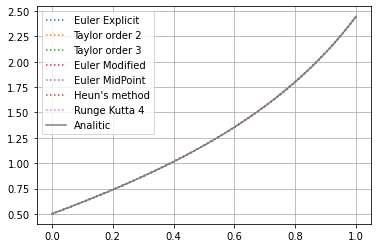

In [7]:
npts = 1029
ts = np.linspace(0, 1, npts)
y0 = 0.5
f = lambda t, y: 1 + (y**2)/2
f_ = lambda t, y: y**2
f__ = lambda t, y: 0
w_eulexp, _ = eulerexplicit(f, y0, ts)
w_tay2, _ = taylormethod([f, f_], y0, ts)
w_tay3, _ = taylormethod([f, f_, f__], y0, ts)
w_eulmod, _ = rungekuttamethod(f, y0, ts, order = 1)
w_eulmid, _ = rungekuttamethod(f, y0, ts, order = 2)
w_heun, _ = rungekuttamethod(f, y0, ts, order = 3)
w_rk4, _ = rungekuttamethod(f, y0, ts, order = 4)
yanalitic = np.sqrt(2) * np.tan(ts/np.sqrt(2) + np.arctan(2**(-3/2)))
plt.plot(ts, w_eulexp, ls="dotted", label="Euler Explicit")
plt.plot(ts, w_tay2, ls="dotted", label="Taylor order 2")
plt.plot(ts, w_tay3, ls="dotted", label="Taylor order 3")
plt.plot(ts, w_eulmod, ls="dotted", label="Euler Modified")
plt.plot(ts, w_eulmid, ls="dotted", label="Euler MidPoint")
plt.plot(ts, w_heun, ls="dotted", label="Heun's method")
plt.plot(ts, w_rk4, ls="dotted", label="Runge Kutta 4")
plt.plot(ts, yanalitic, label="Analitic")
plt.legend()
plt.grid()
plt.show()

### Exercicio 6

> Considere novamente a equação 
> 
> $$y=2-2t+4t^2-4t^3-4t^4$$
> $$0 \le t \le 1 \ \ \ \ \ \ y(0) = 1$$
> 
> Para um tempo fixo $t = 1$, faça um estudo do erro (módulo da diferença entre o valor $y$ calculado
e o valor exato) em função do valor do $\Delta t$ utilizado.
> Compare os resultados obtidos com os 4 métodos. Disserte.

In [8]:
ndivs = 129
manynpts = []
for npts in np.array(10**np.linspace(0.5, 4, ndivs), dtype="int16"):
    if npts not in manynpts:
        manynpts.append(npts)
y0 = 1
yan = 23/15
f = lambda t, y: 2 - 2*t+4*t**2 - 4*t**3 - 4*t**4
f_ = lambda t, y: -2+8*t-12*t**2-16*t**3
f__ = lambda t, y: 8-24*t-48*t**2
methods = ["Euler Explicit", "Taylor order 2", "Taylor order 3", "Euler Modified",
           "Euler MidPoint", "Heun's method", "Runge Kutta 4"]
vectors = {}
for meth in methods:
    vectors[meth] = np.zeros(len(manynpts), dtype="float64")

for i, npts in enumerate(manynpts):
    ts = np.linspace(0, 1, npts)
    vectors["Euler Explicit"][i] = eulerexplicit(f, y0, ts)[0][-1] - yan
    vectors["Taylor order 2"][i] = taylormethod([f, f_], y0, ts)[0][-1] - yan
    vectors["Taylor order 3"][i] = taylormethod([f, f_, f__], y0, ts)[0][-1] - yan
    vectors["Euler Modified"][i] = rungekuttamethod(f, y0, ts, order = 1)[0][-1] - yan
    vectors["Euler MidPoint"][i] = rungekuttamethod(f, y0, ts, order = 2)[0][-1] - yan
    vectors["Heun's method"][i] = rungekuttamethod(f, y0, ts, order = 3)[0][-1] - yan
    vectors["Runge Kutta 4"][i] = rungekuttamethod(f, y0, ts, order = 4)[0][-1] - yan

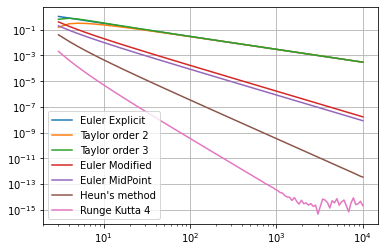

In [9]:
for meth in methods:
    vector = np.abs(vectors[meth])
    plt.plot(manynpts, vector, label=meth)
plt.legend()
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.show()

### Exercicio 7

> O deslocamento angular $\theta(t)$, em radianos, de um pêndulo é dado por 
> 
> $$\dfrac{d^2\theta}{dt^2}+\dfrac{g}{L}\ \sin \theta = 0$$
>
> com
>
> * $\theta(0) = \theta_0$
> * $\theta'(0) = \theta_0'$
> * $g = 9.81\ \text{m}/\text{s}^2$, a aceleração gravitacional
> * $L$ o comprimento do pêndulo.
> 
> Para pequenos valores de $\theta$, essa equação pode ser simplificada para
> 
> $$\dfrac{d^2\theta}{dt^2} + \dfrac{g}{L}\cdot \theta = 0$$
> 
> Faça gráficos de $\theta$ em função de $t$, com um período de oscilação, para $\theta(0) = 0.1$ e $\theta(0) = 0.5$, $\theta'(0)=0$ e $L = 0.1$, $1.0$ e $10$ m.
> Utilize a equação exata e a simplificada. Compare os resultados

$$y' = \begin{bmatrix}\theta' \\ \theta''\end{bmatrix} = \begin{bmatrix}\theta' \\ -\dfrac{g}{L} \cdot \theta\end{bmatrix} = f(t, y)$$

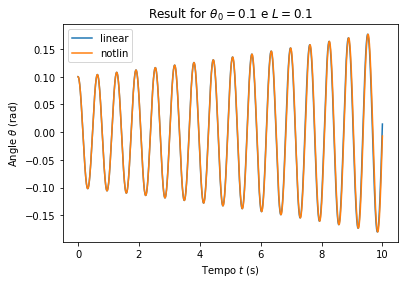

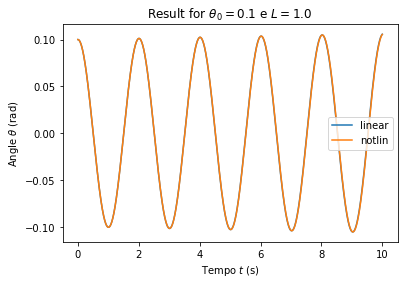

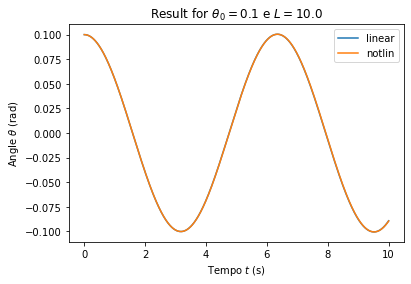

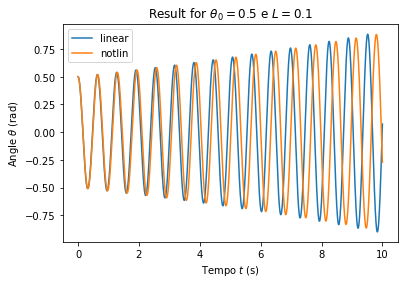

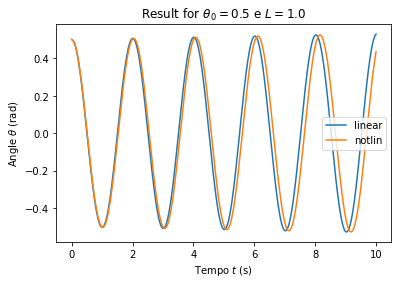

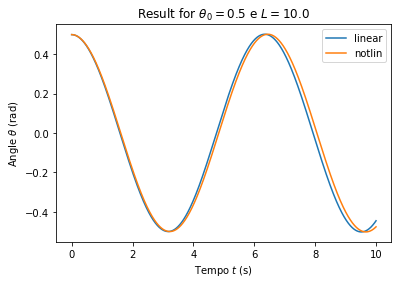

In [10]:
g = 9.81
dth0 = 0
colors = ["blue", "red", "orange"]
ts = np.linspace(0, 10, 2**13+1, dtype="float64")
for i, th0 in enumerate([0.1, 0.5]):
    for j, L in enumerate([0.1, 1.0, 10]):
        plt.figure()
        y0 = [th0, dth0]
        flin = lambda t, y: np.array([y[1], -g*y[0]/L], dtype="float64")
        fsin = lambda t, y: np.array([y[1], -g*np.sin(y[0])/L], dtype="float64")
        wlin, _ = rungekuttamethod(flin, y0, ts)
        wsin, _ = rungekuttamethod(fsin, y0, ts)
        plt.plot(ts, wlin[:, 0], label="linear")
        plt.plot(ts, wsin[:, 0], label="notlin")
        plt.xlabel(r"Tempo $t$ (s)")
        plt.ylabel(r"Angle $\theta$ (rad)")
        plt.title(r"Result for $\theta_0=%.1f$ e $L=%.1f$" % (th0, L))
        plt.legend()
plt.show()

### Exercicio 8

> Em um circuito com tensão aplicada $\epsilon(t)$ e com resistência $R$, indutância $L$ e capacitância $C$ em paralelo, a corrente $i$ satisfaz a equação diferencial
> 
> $$\dfrac{di}{dt}=C\cdot \dfrac{d^2\epsilon}{dt^2}+\dfrac{1}{R}\cdot \dfrac{d\epsilon}{dt}+\dfrac{1}{L}\cdot \epsilon$$
>
> Suponha que $C = 0.3$ *farads*, $R = 1.4$ *ohm*, $L = 1.7$ *henrie* e que a tensão seja dada, em *Volts*,
por
>
> $$\epsilon(t) = \exp\left(-0.06\pi t\right)\cdot \sin \left(2t-\pi\right)$$
>
> Se $i(0) = 0$, encontre a corrente para $t$ entre $0$ e $10$ s.
> Resolva este problema usando o método de Euler Explícito e o método de Runge-Kutta de quarta ordem.
> Compare as soluções

Como essa EDO é simples de se resolver, mas primeiro reescrevemos

$$
\epsilon = - \exp\left(-\xi t\right) \cdot \sin \left(\omega t\right)
$$
$$
\dfrac{d\epsilon}{dt} = \exp \left(-\xi t\right) \left[ \xi \sin \left(\omega t\right) - \omega \cos \left(\omega t\right)\right]
$$
$$
\int \epsilon \ dt = \dfrac{\xi \cdot \sin \left(\omega t\right) + \omega \cdot \cos \left(\omega t\right)}{\omega^2+\xi^2}
$$
$$
i = C \cdot \dfrac{d\epsilon}{dt} + \dfrac{1}{R} \cdot \epsilon + \dfrac{1}{L} \int \epsilon \ dt
$$

Logo 

$$
\boxed{i(t) = i_{sin}(t) + i_{cos}(t) + \text{const}}
$$
$$
i_{sin}(t) = \left(\xi C - \dfrac{1}{R} + \dfrac{1}{L} \cdot \dfrac{\xi}{\xi^2+\omega^2}\right) \cdot \exp\left(-\xi t\right) \cdot \sin \left(\omega t\right)
$$
$$
i_{cos}(t) = \left(-\omega C + \dfrac{1}{L} \cdot \dfrac{\omega}{\xi^2 + \omega^2}\right) \cdot \exp\left(-\xi t\right) \cdot \cos \left(\omega t\right)
$$

No tempo $t=0$ temos a condição inicial de que $i_0 = 0$ então teremos a constante de

$$
i(0) = i_{sin}(0) + i_{cos}(0) + \text{const} = \left(-\omega C + \dfrac{1}{L} \cdot \dfrac{\omega}{\xi^2 + \omega^2}\right) + \text{const}
$$
$$
\text{const} = \omega C - \dfrac{1}{L} \cdot \dfrac{\omega}{\xi^2 + \omega^2}
$$
$$
\boxed{i(t) = i_{sin}(t) + i_{cos}(t) + \left(\omega C - \dfrac{1}{L} \cdot \dfrac{\omega}{\xi^2 + \omega^2}\right)}
$$

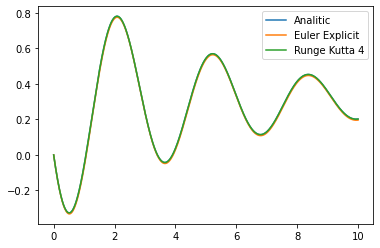

In [11]:
C, R, L = 0.3, 1.4, 1.7
xi = 0.06*np.pi
wn = 2
t, i = sp.symbols("t i", real=True)
eps = -sp.exp(-xi*t) * sp.sin(wn*t)
eps_ = sp.diff(eps, t)
eps__ = sp.diff(eps_, t)
fsymb = C * eps__ + eps_/R + eps/L
f = sp.lambdify((t, i), fsymb)
ts = np.linspace(0, 10, 1049)
i0 = 0
w_eulexp, _ = eulerexplicit(f, i0, ts)
w_runkt4, _ = rungekuttamethod(f, i0, ts)
const = (wn*C - wn/(L*(xi**2+wn**2)))
isin = (xi*C - 1/R + xi/(L*(xi**2+wn**2)))*np.exp(-xi*ts)*np.sin(wn*ts)
icos = const*(1-np.exp(-xi*ts)*np.cos(wn*ts))
i_analitic = isin + icos
plt.plot(ts, i_analitic, label="Analitic")
plt.plot(ts, w_eulexp, label="Euler Explicit")
plt.plot(ts, w_runkt4, label="Runge Kutta 4")
plt.legend()

### Exercicio 9

> O crescimento populacional de uma dada espécie pode ser modelado por uma EDO do tipo
> 
> $$\dfrac{dN}{dt} = aN - bN^2$$
> 
> em que
>
> * $N(0) = N_0$
> * $N$ é a população
> * $aN$ representa a taxa de nascimento
> * $bN^2$ representa a taxa de mortalidade causada por doenças e competição por alimentos.
> 
> Se
>  
> * $N_0 = 100000$
> * $a = 0.1$
> * $b = 10^{−7}$
> 
> calcule $N(t)$ para $t$ entre $0$ e $20$ anos.
> 
> Varie o coeficiente $b$ e veja como isso afeta no número de indivíduos.
> Resolva este problema usando o método de Euler Explícito e o método de Runge-Kutta de quarta ordem.
> Compare as soluções

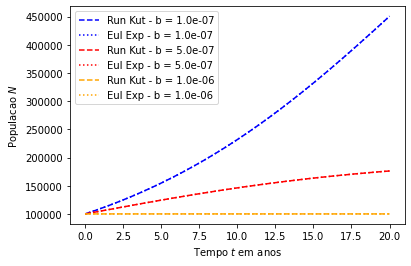

In [12]:
N0 = 1e+5
a = 0.1
colors = ["blue", "red", "orange"]
for i, b in enumerate([1e-7, 5e-7, 1e-6]):
    f = lambda t, N: a*N - b*N**2
    ts = np.linspace(0, 20, 1029)
    w_eulexp, _ = eulerexplicit(f, N0, ts)
    w_runkt4, _ = rungekuttamethod(f, N0, ts, order=4)
    plt.plot(ts, w_runkt4, ls="dashed", color=colors[i], label="Run Kut - b = %.1e" % b)
    plt.plot(ts, w_eulexp, ls="dotted", color=colors[i], label="Eul Exp - b = %.1e" % b)
    plt.xlabel(r"Tempo $t$ em anos")
    plt.ylabel(r"Populacao $N$")
plt.legend()

### Exercicio 10

> As populações de duas espécies competindo pela mesma fonte de alimentação podem ser modeladas pelo par de EDOS
> 
> $$\dfrac{dN_1}{dt} = N_1\left(a_1 - b_1 N_1 - c_1 N_2\right)$$
> $$\dfrac{dN_2}{dt} = N_2\left(a_2 - b_2 N_2 - c_2 N_1\right)$$
> 
> Com
> 
> * $N_1(t=0) = N_{1,0}$
> * $N_2(t=0) = N_{2,0}$
> 
> Nessas equações
> 
> * $N_i$ é o número de indivíduos da espécie $i$
> * $a_iN_i$ representa a taxa de nascimento
> * $b_iN_i^2$ representa a taxa de mortalidade
> * $c_iN_iN_j$ representa a taxa de mortalidade devido à competição por alimentos.
> 
> Se
> 
> * $N_{1,0} = N_{2,0} = 10^5$
> * $a_1 = 0.1$, $b_1 = 8 \cdot 10^{-7}$ e $c_1 = 10^{−6}$
> * $a_2 = 0.1$, $b_2 = 8 \cdot 10^{−7}$ e $c_2 = 10^{−7}$
> 
> calcule $N_{1}(t)$ e $N_{2}(t)$ entre $0$ e $10$ anos

Podemos reescrever o sistema em formulação matricial

$$
y = \begin{bmatrix} N_1 \\ N_2 \end{bmatrix} \Rightarrow y' = \begin{bmatrix} \frac{dN_1}{dt} \\ \frac{dN_2}{dt}\end{bmatrix}
$$
$$
y' = f(t, y) = \begin{bmatrix} a_1 N_1 -b_1N_1^2 -c_1 N_1N_2 \\ a_2 N_2 -b_2 N_2^2 - c_2 N_1N_2\end{bmatrix} 
$$

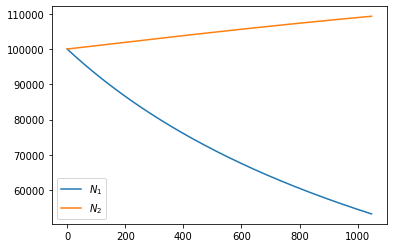

In [13]:
def f(t, y):
    f1 = a1 * y[0] - b1 * y[0]**2 - c1 * y[0] * y[1]
    f2 = a2 * y[1] - b2 * y[1]**2 - c2 * y[0] * y[1]
    return np.array([f1, f2], dtype="float64")

a1, a2 = 0.1, 0.1
b1, b2 = 8e-7, 8e-7
c1, c2 = 1e-6, 1e-7
N10 = N20 = 1e+5

y0 = np.array([N10, N20], dtype="float64")
ts = np.linspace(0, 10, 1049)
w_runkt4, _ = rungekuttamethod(f, y0, ts)
plt.plot(w_runkt4[:, 0], label=r"$N_{1}$")
plt.plot(w_runkt4[:, 1], label=r"$N_{2}$")
plt.legend()